In [462]:
# Lets first load in the relevant yearly files
import pickle

def keep_duplicate_player_most_minutes(input_df):
    idx_to_keep = []
    idx_to_drop = []
    for curr_player in input_df['Player']:
        check_dup = input_df[['Player','MP']][input_df['Player'] == curr_player]
        idx_to_keep.append(check_dup['MP'].idxmax())
        all_idx = check_dup['MP'].index.tolist()
        idx_to_drop.extend([i for i in all_idx if i != check_dup['MP'].idxmax()])
    idx_to_keep = np.unique(idx_to_keep)
    idx_to_drop = np.unique(idx_to_drop)
    output_df = input_df.drop(input_df.index[idx_to_drop])
    return output_df

with open('/Users/rohanramesh/Documents/SportsData/NBA/YearlyBasicData.pickle', 'rb') as handle:
    Yearly_df = pickle.load(handle)

    
with open('/Users/rohanramesh/Documents/SportsData/NBA/YearlyAdvData.pickle', 'rb') as handle:
    Yearly_df_adv = pickle.load(handle)

with open('/Users/rohanramesh/Documents/SportsData/NBA/Yearly100possData.pickle', 'rb') as handle:
    Yearly_df_100pos = pickle.load(handle)

years_to_use = range(2008,2019)

In [463]:
# remove doubles for each year
for curr_year in years_to_use:
    print(curr_year)
    Yearly_df[str(curr_year)] = keep_duplicate_player_most_minutes(Yearly_df[str(curr_year)])
    Yearly_df_adv[str(curr_year)] = keep_duplicate_player_most_minutes(Yearly_df_adv[str(curr_year)])
    Yearly_df_100pos[str(curr_year)] = keep_duplicate_player_most_minutes(Yearly_df_100pos[str(curr_year)])

2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018


In [167]:
# Lets look at pairs of years and find those positional players that had the largest jump in some statistical category
import numpy as np
import pandas as pd
curr_basic_header = list(Yearly_df['2018'])
curr_adv_header = list(Yearly_df_adv['2018'])
stat_to_consider = 'PER'
stats_include = ['Player', stat_to_consider, 'MP', 'Pos']
position_to_test = 'PF'
for curr_year in range(2018,2017,-1):
    # lets first declare a position
    idx = (Yearly_df_adv[str(curr_year)]['Pos'] == position_to_test) & (Yearly_df_adv[str(curr_year)]['MP'] > 400)
    curr_stat = Yearly_df_adv[str(curr_year)][stats_include][idx]
    curr_stat = keep_duplicate_player_most_minutes(curr_stat) # remove duplicates
    # for previous year don't care about what position was
    idx = (Yearly_df_adv[str(curr_year-1)]['MP'] > 400)
    previous_yr_stat = Yearly_df_adv[str(curr_year-1)][stats_include][idx]
    previous_yr_stat = keep_duplicate_player_most_minutes(previous_yr_stat)
    # now for each player iterate through and look the year before for that player
    print(np.shape(curr_stat))
    stat_difference = []
    for curr_player in curr_stat['Player']:
        prev_stat = previous_yr_stat[stats_include][previous_yr_stat['Player'] == curr_player]
        if prev_stat.empty:
            print(curr_player)
        else:
#             print(prev_stat)
            stat_player_curr_year = curr_stat[stat_to_consider][curr_stat['Player'] == curr_player].tolist()
            stat_player_last_year = prev_stat[stat_to_consider].tolist()
            print(stat_player_curr_year)
            print(stat_player_last_year)
            print(stat_player_curr_year[0]-stat_player_last_year[0])
#             stat_difference.append(stat_player_curr_year-prev_stat[stat_to_consider])
#     print(stat_difference)
    

(69, 4)
[8.2]
[11.8]
-3.6000000000000014
[12.0]
[11.3]
0.6999999999999993
[12.6]
[13.5]
-0.9000000000000004
[27.3]
[26.1]
1.1999999999999993
[12.7]
[17.9]
-5.199999999999999
[15.8]
[16.3]
-0.5
[17.8]
[17.8]
0.0
[7.1]
[5.3]
1.7999999999999998
[14.1]
[12.9]
1.1999999999999993
[12.6]
[11.0]
1.5999999999999996
[14.9]
[15.7]
-0.7999999999999989
Tyler Cavanaugh
[11.1]
[12.3]
-1.200000000000001
John Collins
[28.9]
[27.5]
1.3999999999999986
[11.5]
[13.1]
-1.5999999999999996
Cheick Diallo
[8.8]
[10.6]
-1.799999999999999
[26.0]
[27.6]
-1.6000000000000014
[17.4]
[20.3]
-2.900000000000002
[7.6]
[7.7]
-0.10000000000000053
[18.0]
[17.9]
0.10000000000000142
[15.4]
[15.0]
0.40000000000000036
[16.5]
[14.5]
2.0
[16.2]
[10.1]
6.1
[16.1]
[16.5]
-0.3999999999999986
[14.0]
[13.5]
0.5
[14.8]
[10.5]
4.300000000000001
[19.6]
[22.6]
-3.0
[17.1]
[16.9]
0.20000000000000284
Josh Huestis
[14.7]
[16.4]
-1.6999999999999993
[14.9]
[14.6]
0.3000000000000007
Jonathan Isaac
[28.6]
[27.0]
1.6000000000000014
[13.2]
[9.3]
3

In [85]:
curr_player = 'Quincy Acy'
# print(previous_yr_stat['Player'] == curr_player)
tmpR = previous_yr_stat[['Player', 'PER', 'MP']][previous_yr_stat['Player'] == curr_player]
print(np.shape(tmpR)[0])

2


In [465]:
# important functions
import numpy as np
import pandas as pd
from scipy import stats
# build a function that will add a category that looks at the change in a stat from the previous year
def add_column_for_change_in_stat(df,stat_to_consider):
    # lets get the years to consider
    all_years = [int(i) for i in list(df)[::-1]]  
    stats_include = ['Player', stat_to_consider]
    for curr_year in all_years[0:-1]:
        # current year stat
        curr_stat = df[str(curr_year)][stats_include]
        # for previous year don't care about what position was
        previous_yr_stat = df[str(curr_year-1)][stats_include]
        # now for each player iterate through and look the year before for that player
        stat_difference = []
        for curr_player in curr_stat['Player']:
            prev_stat = previous_yr_stat[stats_include][previous_yr_stat['Player'] == curr_player]
            if prev_stat.empty:
    #             print(curr_player)
                stat_difference.append(np.nan)
            else:
                stat_player_curr_year = curr_stat[stat_to_consider][curr_stat['Player'] == curr_player].tolist()
                stat_player_last_year = prev_stat[stat_to_consider].tolist()
                stat_difference.append(stat_player_curr_year[0]-stat_player_last_year[0])
        # now define this as a dict so that can append into dataframe
        df[str(curr_year)]['d'+stat_to_consider] = stat_difference
    return df

def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

def apply_stat_between_df(criterion1,df1,df2,stat1,stat2):
#         criterion = Yearly_df[str(curr_year)]['MP'] > 10
        players_keep = df1['Player'][criterion1]
        output_df1 = df1[stat1][criterion]
        idx2 = df2['Player'].isin(players_keep.tolist())
        output_df2 = df2[stat2][idx2]
        return output_df1, output_df2

def abline(slope, intercept):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(x_vals, y_vals, '-')

In [466]:
# lets built a stat that is fractional scoring from 3p and from 2p for 100 pos
for curr_year in years_to_use:
    FG_fraction_2 = Yearly_df_100pos[str(curr_year)]['2P']/Yearly_df_100pos[str(curr_year)]['FG']
    FG_fraction_3 = Yearly_df_100pos[str(curr_year)]['3P']/Yearly_df_100pos[str(curr_year)]['FG']
    Scoring_fraction_2 = (Yearly_df_100pos[str(curr_year)]['2P']*2)/Yearly_df_100pos[str(curr_year)]['PTS']
    Scoring_fraction_3 = (Yearly_df_100pos[str(curr_year)]['3P']*3)/Yearly_df_100pos[str(curr_year)]['PTS']
    Yearly_df_100pos[str(curr_year)]['2P/FG'] = FG_fraction_2
    Yearly_df_100pos[str(curr_year)]['3P/FG'] = FG_fraction_3
    Yearly_df_100pos[str(curr_year)]['2P/PS'] = Scoring_fraction_2
    Yearly_df_100pos[str(curr_year)]['3P/PS'] = Scoring_fraction_3
    Yearly_df_100pos[str(curr_year)]['3PA/FGA'] = Yearly_df_100pos[str(curr_year)]['3PA']/Yearly_df_100pos[str(curr_year)]['FGA']
    Yearly_df_100pos[str(curr_year)]['2PA/FGA'] = Yearly_df_100pos[str(curr_year)]['2PA']/Yearly_df_100pos[str(curr_year)]['FGA']
    

In [468]:
# add the change in stats to the adv stats
stats_to_look_at_increment = ['PER','VORP','USG%','WS','MP']
for curr_stat in stats_to_look_at_increment:
    Yearly_df_adv = add_column_for_change_in_stat(Yearly_df_adv,curr_stat)
    
# for basic stats
stats_to_look_at_increment = ['3PA','3P%','3P','3P/PS','AST','2PA','2P%','PS/G','MP']
for curr_stat in stats_to_look_at_increment:
    Yearly_df = add_column_for_change_in_stat(Yearly_df,curr_stat)

# for per 100 pos stats
stats_to_look_at_increment = ['3PA','3P%','3P','3P/PS','AST','2PA','2P%','PTS','MP','DRtg','ORtg','FG%']
for curr_stat in stats_to_look_at_increment:
    Yearly_df_100pos = add_column_for_change_in_stat(Yearly_df_100pos,curr_stat)

In [455]:
print(list(Yearly_df_100pos['2018']))

['', '2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST', 'Age', 'BLK', 'DRB', 'DRtg', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'G', 'GS', 'MP', 'ORB', 'ORtg', 'PF', 'PTS', 'Player', 'Pos', 'STL', 'TOV', 'TRB', 'Tm', '2P/FG', '3P/FG', '2P/PS', '3P/PS', '3PA/FGA', '2PA/FGA', 'd3PA', 'd3P%', 'd3P', 'd3P/PS', 'dAST', 'd2PA', 'd2P%', 'dPTS', 'dMP', 'dDRtg', 'dORtg', 'dFG%']


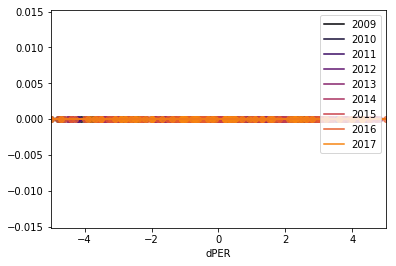

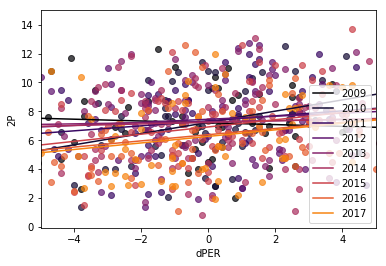

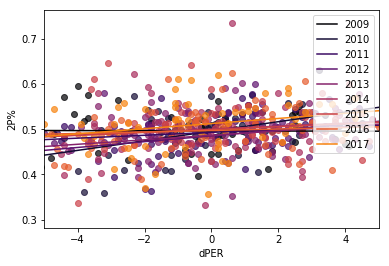

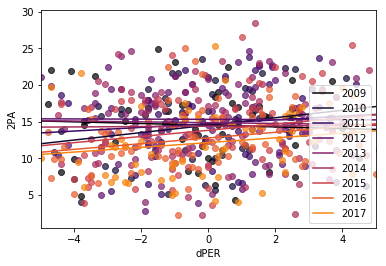

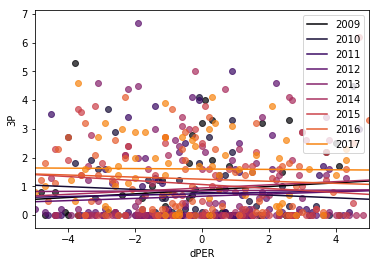

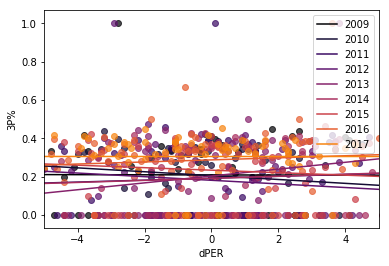

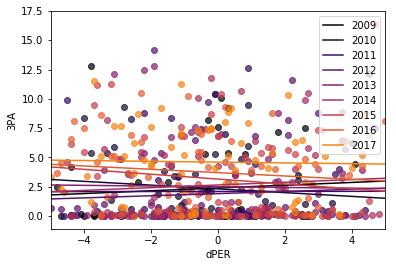

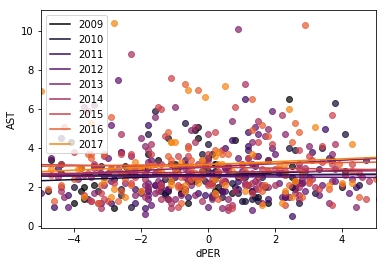

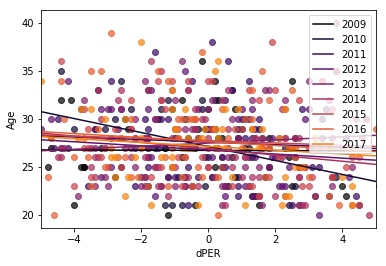

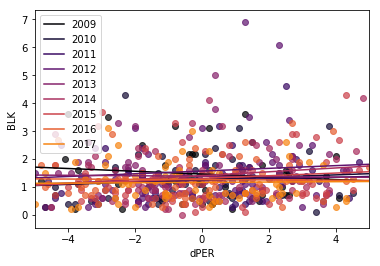

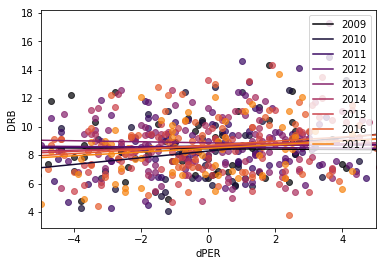

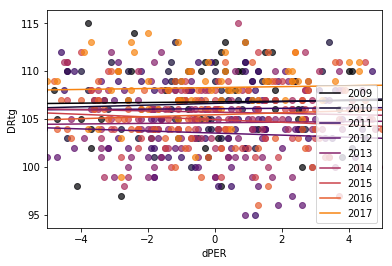

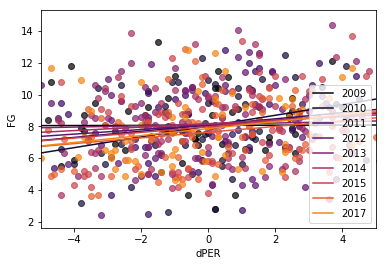

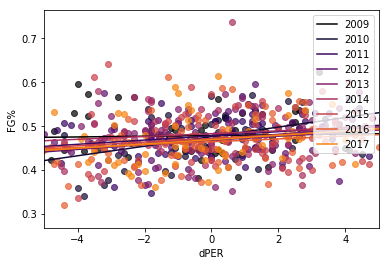

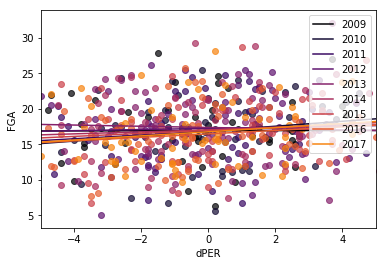

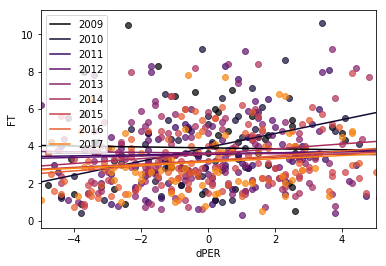

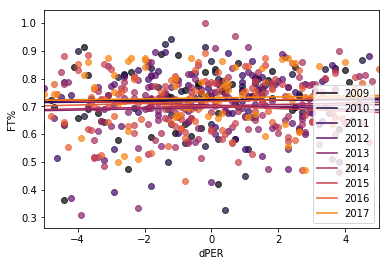

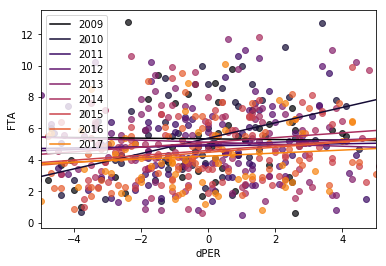

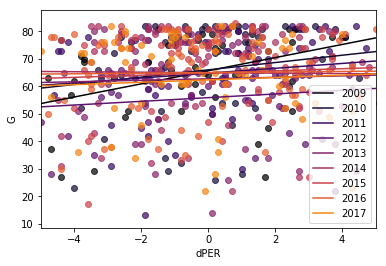

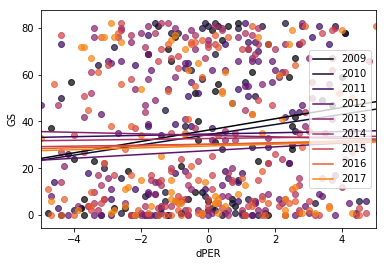

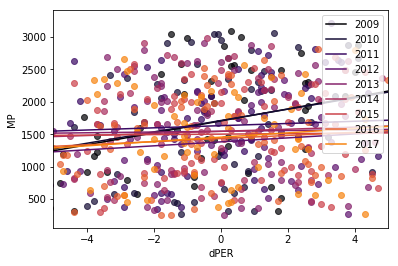

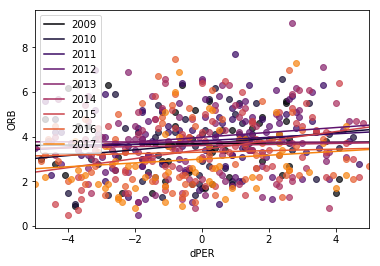

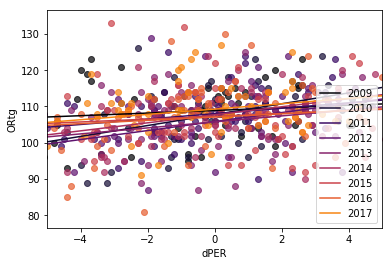

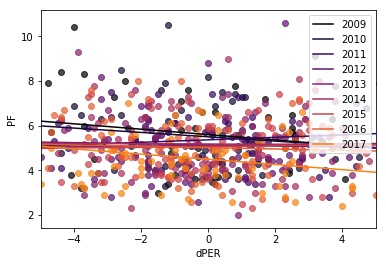

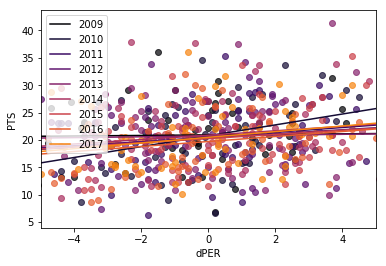

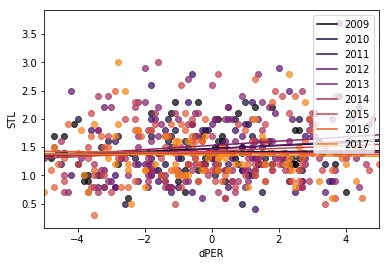

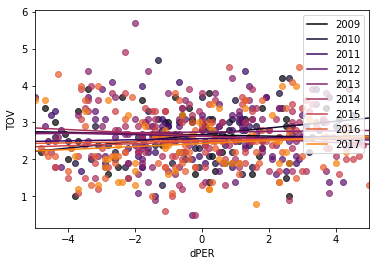

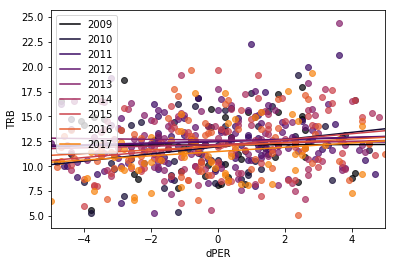

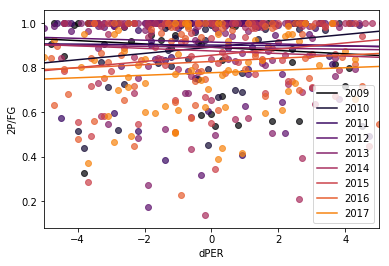

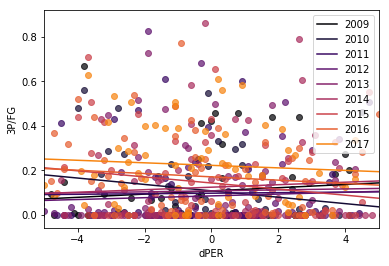

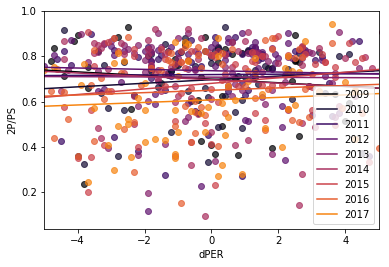

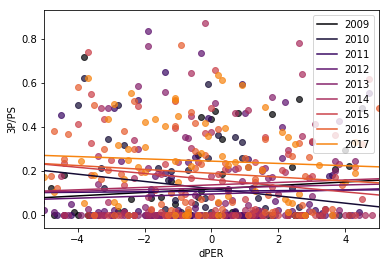

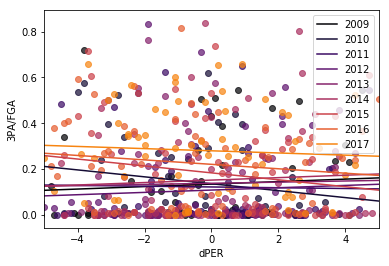

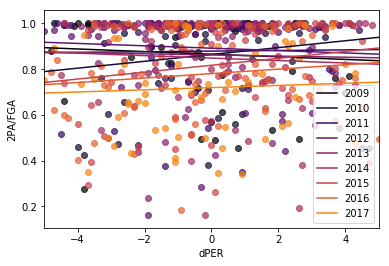

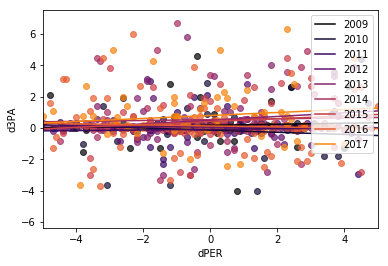

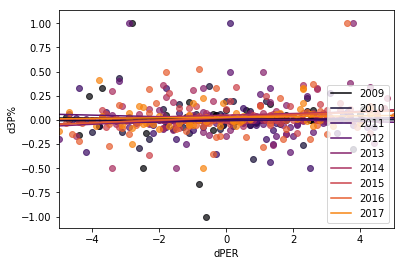

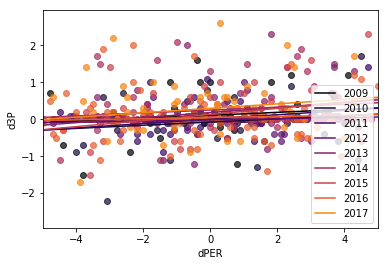

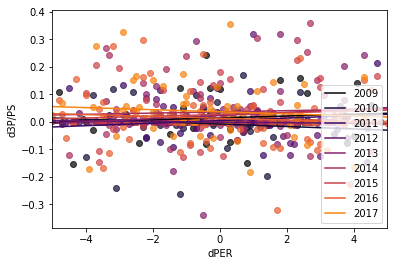

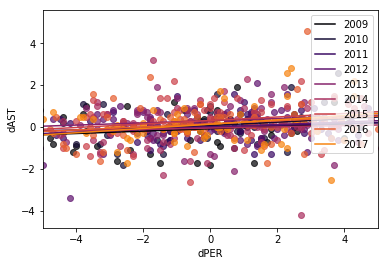

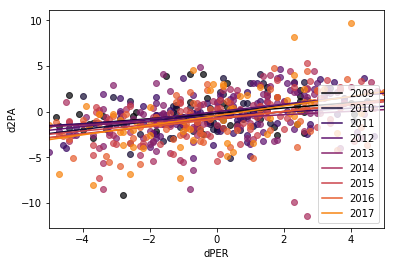

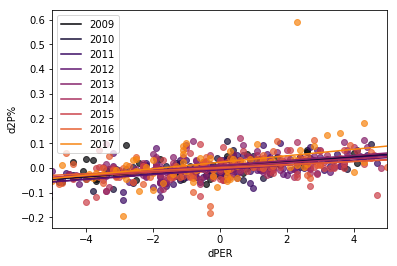

In [485]:
import matplotlib.pyplot as plt
%matplotlib inline
cm = plt.get_cmap('inferno',len(range(2010,2019))+3)
# lets get all headers that are numeric
curr_header = list(Yearly_df['2018'])
curr_adv_header = list(Yearly_df_adv['2018'])
curr_100poss_header = list(Yearly_df_100pos['2018'])
# numeric_headers = [list(Yearly_df['2018'])[i] for i 
#                    in range(0,len(curr_header)) if isfloat(Yearly_df['2018'].iloc[0,i])]
numeric_headers = [list(Yearly_df_100pos['2018'])[i] for i 
                   in range(0,len(curr_header)) if isfloat(Yearly_df_100pos['2018'].iloc[0,i])]
stat_plot_against = 'dPER'
years_string = ["{:02d}".format(x) for x in years_to_use[1:-1]]
for curr_stat in numeric_headers:
    cidx = 0
    for curr_year in years_to_use[1:-1]:
        # players to consider
        criterion = (Yearly_df_100pos[str(curr_year)]['MP'] > 250) & (Yearly_df_100pos[str(curr_year)]['Pos'] == 'PF')
        (output1,output2) = apply_stat_between_df(criterion,
                        Yearly_df_100pos[str(curr_year)],Yearly_df_adv[str(curr_year)],curr_stat,stat_plot_against)
        output2 = output2.as_matrix()
        output1 = output1.as_matrix()
        idx_nonnan = ~np.isnan(output2) & ~np.isnan(output1)
        output2 = output2[idx_nonnan]
        output1 = output1[idx_nonnan]
        slope, intercept, r_value, p_value, std_err = stats.linregress(output2,output1)
        plt.scatter(output2,output1,c=cm.colors[cidx],alpha=0.7)
        # for best fit line
        x_vals = np.array(plt.gca().get_xlim())
        y_vals = intercept + slope * x_vals
        plt.plot(x_vals, y_vals, '-',color=cm.colors[cidx])
        plt.xlabel(stat_plot_against)
        plt.ylabel(curr_stat)
        # set xlim
        plt.xlim((-5, 5))
        cidx+=1
    plt.legend(years_string,loc='best')
    plt.show()


In [476]:
print(years_to_use[-1:1:-1])

range(2018, 2009, -1)


In [458]:
print(numeric_headers)

['', '2P', '2P%', '2PA', '3P', '3P%', '3PA', 'AST', 'Age', 'BLK', 'DRB', 'DRtg', 'FG', 'FG%', 'FGA', 'FT', 'FT%', 'FTA', 'G', 'GS', 'MP', 'ORB', 'PTS', 'Player', 'Pos', 'TOV', 'TRB', 'Tm', '2P/FG', '3P/FG', '2P/PS', '3P/PS', '3PA/FGA', '2PA/FGA', 'd3PA', 'd3P%', 'd3P', 'd3P/PS', 'dAST', 'd2PA', 'd2P%']
